<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/assignment/ass7/bdm/KicapSambal/Vaex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment 7: Comparison between libraries**



*   Code below is using the **`Vaex`** library






**TEAM MEMBERS:**
```
ZUHAYR ARIF BIN ZAKARIA (MCS231002)
MOHD NOR BIN MOHIDIN (MCS231008)
NABILA HUSNA BINTI ROSLI (MCS231009)
NUR AZIMAH BINTI MOHD SALLEH (MCS231011)
```

###**Pick a Big Dataset**

###**Dataset :** `Spotify Charts`


###**About**
This complete dataset is about all of the "Top 200" and "Viral 50" charts published globally by Spotify with a file size of 3.48 GB.

It has 26,173,514 observations and 9 columns, including title, rank, date, artist, url, region, chart, trend, and stream. This dataset contains the top 200 streamed tracks on Spotify every day from Jan 1 2017 to Dec 31 2021, collected by using Spotify API.


###**Loading the Dataset**

In [1]:
# Install Kaggle Phyton Library
! pip install kaggle

In [2]:
# Mount the Google Drive to store Kaggle API Credential
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Make a directory for Kaggle at temporary location on drive
! mkdir ~/.kaggle

In [4]:
# upload the jason file to google drive and copy to temporary location
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d dhruvildave/spotify-charts -f charts.csv

100% 945M/945M [00:16<00:00, 65.1MB/s]
100% 945M/945M [00:16<00:00, 59.3MB/s]


In [6]:
!unzip charts.csv.zip

Archive:  charts.csv.zip
  inflating: charts.csv              


## **Install Vaex library**

In [7]:
pip install vaex-viz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 37.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.8 MB/s eta 0:00:00
  Created wheel for aplus: filename=aplus-0.11.0-py3-none-any.whl size=4366 sha256=a94ad89d7f9023deedf9a72eda8d035a65d7df0f8b28387ffc8aed7e7ee54858
  Stored in directory: /root/.cache/pip/wheels/74/ed/14/4d7bffd9475a07582e0c256b9b1ddbbc1f49c58e3150d356f4
Successfully built aplus


## **Import libraries**

In [8]:
%%capture
%%bash
python -m pip install -U pip
python -m pip install vaex-core
python -m pip install vaex-hdf5
python -m pip install -U ipython ipykernel

In [9]:
import vaex
import gc
import numpy as np
import pandas as pd
import warnings
import time
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## **1. Read Data**

In [10]:
# Read CSV file into a DataFrame

%%time

df = vaex.open('/content/charts.csv')


CPU times: user 2.51 s, sys: 296 ms, total: 2.8 s
Wall time: 4.54 s


In [11]:
%%time
df

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.06 µs


#,title,rank,date,artist,url,region,chart,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,'https://open.spotify.com/track/6mICuAdrwEjh6Y6l...,Argentina,top200,SAME_POSITION,253019
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,'https://open.spotify.com/track/7DM4BPaS7uofFul3...,Argentina,top200,MOVE_UP,223988
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,'https://open.spotify.com/track/3AEZUABDXNtecAOS...,Argentina,top200,MOVE_DOWN,210943
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",'https://open.spotify.com/track/6rQSrBHf7HlZjtcM...,Argentina,top200,SAME_POSITION,173865
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,'https://open.spotify.com/track/58IL315gMSTD37DO...,Argentina,top200,MOVE_UP,153956
...,...,...,...,...,...,...,...,...,...
"26,173,509",BYE,46,2021-07-31,Jaden,'https://open.spotify.com/track/3OUyyDN7EZrL7i0S...,Vietnam,viral50,MOVE_UP,--
"26,173,510",Pillars,47,2021-07-31,My Anh,'https://open.spotify.com/track/6eky30oFiQbHUATD...,Vietnam,viral50,NEW_ENTRY,--
"26,173,511",Gái Độc Thân,48,2021-07-31,Tlinh,'https://open.spotify.com/track/2klsSb2iTfgDh95A...,Vietnam,viral50,MOVE_DOWN,--
"26,173,512",Renegade (feat. Taylor Swift),49,2021-07-31,Big Red Machine,'https://open.spotify.com/track/1aU1wpYBSpP0M6Ii...,Vietnam,viral50,MOVE_DOWN,--


##**2. Data Exploration**

In [12]:
%%time

df.head()

CPU times: user 946 µs, sys: 0 ns, total: 946 µs
Wall time: 957 µs


#,title,rank,date,artist,url,region,chart,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,'https://open.spotify.com/track/6mICuAdrwEjh6Y6l...,Argentina,top200,SAME_POSITION,253019
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,'https://open.spotify.com/track/7DM4BPaS7uofFul3...,Argentina,top200,MOVE_UP,223988
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,'https://open.spotify.com/track/3AEZUABDXNtecAOS...,Argentina,top200,MOVE_DOWN,210943
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",'https://open.spotify.com/track/6rQSrBHf7HlZjtcM...,Argentina,top200,SAME_POSITION,173865
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,'https://open.spotify.com/track/58IL315gMSTD37DO...,Argentina,top200,MOVE_UP,153956
5,Traicionera,6,2017-01-01,Sebastian Yatra,'https://open.spotify.com/track/5J1c3M4EldCfNxXw...,Argentina,top200,MOVE_DOWN,151140
6,Cuando Se Pone a Bailar,7,2017-01-01,Rombai,'https://open.spotify.com/track/1MpKZi1zTXpERKwx...,Argentina,top200,MOVE_DOWN,148369
7,Otra vez (feat. J Balvin),8,2017-01-01,Zion & Lennox,'https://open.spotify.com/track/3QwBODjSEzelZyVj...,Argentina,top200,MOVE_DOWN,143004
8,La Bicicleta,9,2017-01-01,"Carlos Vives, Shakira",'https://open.spotify.com/track/0sXvAOmXgjR2QUqL...,Argentina,top200,MOVE_UP,126389
9,Dile Que Tu Me Quieres,10,2017-01-01,Ozuna,'https://open.spotify.com/track/20ZAJdsKB5IGbGj4...,Argentina,top200,MOVE_DOWN,112012


In [13]:
%%time

df.info()

CPU times: user 1.1 s, sys: 173 ms, total: 1.27 s
Wall time: 1.32 s


In [14]:
# Convert the 'date' datatype to allow for summary statistics that can be done later

df['date'] = df['date'].astype('datetime64[ns]')

In [15]:
%%time

df.describe()

CPU times: user 3min 42s, sys: 27.7 s, total: 4min 10s
Wall time: 3min 8s


,title,rank,date,artist,url,region,chart,trend,streams
data_type,string,int64,datetime64[ns],string,string,string,string,string,int64
count,26173514,26173514,26173514,26173514,26173514,26173514,26173514,26173514,20321904
NA,0,0,0,0,0,0,0,0,5851610
mean,--,80.92313722184954,1970-01-01T00:03:48.770847786,--,--,--,--,--,55261.314376595816
std,--,59.186014,44477227019771232.0,--,--,--,--,--,209587.23955
min,--,1,2017-01-01T00:00:16.364011520,--,--,--,--,--,1001
max,--,200,2021-12-31T00:00:16.830693376,--,--,--,--,--,19749704


In [16]:
%%time

df.shape

CPU times: user 47 µs, sys: 7 µs, total: 54 µs
Wall time: 58.4 µs


(26173514, 9)

In [17]:
#Data Exploration For Column 'title'

%%time

df['title'].nunique()

CPU times: user 33.5 s, sys: 3.2 s, total: 36.7 s
Wall time: 23.4 s


164807

In [18]:
%%time

df['title']

CPU times: user 17 µs, sys: 0 ns, total: 17 µs
Wall time: 21.5 µs


Expression = title
Length: 26,173,514 dtype: string (column)
-----------------------------------------
       0        Chantaje (feat. Maluma)
       1    Vente Pa' Ca (feat. Maluma)
       2     Reggaetón Lento (Bailemos)
       3                         Safari
       4                    Shaky Shaky
                  ...                  
26173509                            BYE
26173510                        Pillars
26173511                   Gái Độc Thân
26173512  Renegade (feat. Taylor Swift)
26173513                Letter to Jarad

In [19]:
#Data Exploration For Column 'artist'

%%time

df['artist'].nunique()

CPU times: user 32.1 s, sys: 2.82 s, total: 34.9 s
Wall time: 21.1 s


96157

In [20]:

%%time

df['artist']

CPU times: user 14 µs, sys: 1e+03 ns, total: 15 µs
Wall time: 19.8 µs


Expression = artist
Length: 26,173,514 dtype: string (column)
-----------------------------------------
       0                                Shakira
       1                           Ricky Martin
       2                                   CNCO
       3  J Balvin, Pharrell Williams, BIA, Sky
       4                           Daddy Yankee
                      ...                      
26173509                                  Jaden
26173510                                 My Anh
26173511                                  Tlinh
26173512                        Big Red Machine
26173513              LRN Slime, Shiloh Dynasty

In [21]:
#Data Exploration For Column 'region'

%%time

df['region'].nunique()

CPU times: user 29 s, sys: 2.7 s, total: 31.7 s
Wall time: 21.3 s


70

In [22]:
%%time

df['region'].unique()

CPU times: user 28.9 s, sys: 2.79 s, total: 31.7 s
Wall time: 21.5 s


['Colombia',
 'Denmark',
 'Dominican Republic',
 'Greece',
 'Norway',
 'Panama',
 'Slovakia',
 'Andorra',
 'Romania',
 'France',
 'Hong Kong',
 'Philippines',
 'United Kingdom',
 'Thailand',
 'Saudi Arabia',
 'Morocco',
 'Austria',
 'Luxembourg',
 'Singapore',
 'Switzerland',
 'Israel',
 'South Korea',
 'Brazil',
 'El Salvador',
 'Estonia',
 'United States',
 'Bulgaria',
 'Costa Rica',
 'Sweden',
 'India',
 'Latvia',
 'Lithuania',
 'Portugal',
 'Turkey',
 'Argentina',
 'Honduras',
 'Indonesia',
 'Belgium',
 'Ecuador',
 'Netherlands',
 'New Zealand',
 'Vietnam',
 'Hungary',
 'Poland',
 'Egypt',
 'South Africa',
 'Germany',
 'Iceland',
 'Italy',
 'Spain',
 'Taiwan',
 'Russia',
 'Ukraine',
 'Canada',
 'Chile',
 'Czech Republic',
 'Guatemala',
 'Nicaragua',
 'Uruguay',
 'United Arab Emirates',
 'Bolivia',
 'Finland',
 'Peru',
 'Australia',
 'Global',
 'Ireland',
 'Japan',
 'Malaysia',
 'Mexico',
 'Paraguay']

Extract the year from column date

In [23]:
# date Datatype has been converted into datetime64 earlier before performing basic statistic.

%%time

df['year'] = df['date'].dt.year

CPU times: user 1.42 ms, sys: 0 ns, total: 1.42 ms
Wall time: 1.43 ms


In [24]:
%%time

songs_per_year = df.groupby('year').agg({'title': 'count'})
print(songs_per_year)


  #    year    title
  0    2017  4401145
  1    2018  4863016
  2    2019  5412669
  3    2020  5793148
  4    2021  5703536
CPU times: user 54 s, sys: 5.15 s, total: 59.2 s
Wall time: 37.5 s


##**3. EDA Visualization**

### **Top 5 artists**

In [25]:
# Top 5 artists

%%time

counts = df['artist'].value_counts()
counts.head()

CPU times: user 32.1 s, sys: 3.36 s, total: 35.4 s
Wall time: 23.7 s


Ed Sheeran       387917
Billie Eilish    251825
Post Malone      211272
Bad Bunny        203403
Ariana Grande    189914
dtype: int64

###**Bottom 5 artists**

In [26]:
# Bottom 5 artists

%%time

counts = df['artist'].value_counts()
counts.tail()

CPU times: user 32.3 s, sys: 3.35 s, total: 35.7 s
Wall time: 31.1 s


Sonido Verde de Moyobamba    1
Just A Gent, MOZA            1
Inkyz, Drama B               1
Barrio Viejo                 1
Dizzy Gillespie              1
dtype: int64

###**Distribution of Streams Among Regions**

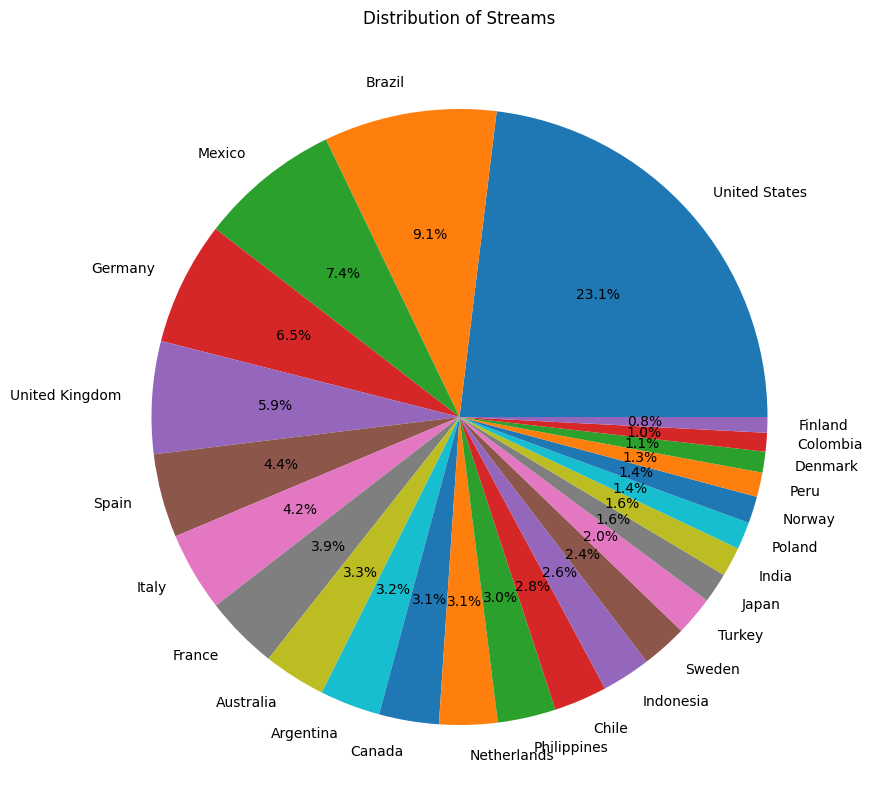

CPU times: user 59.1 s, sys: 7.02 s, total: 1min 6s
Wall time: 43 s


In [29]:
#Stream by region

%%time

# Filter data for 'chart' equal to 'top200'
global_200 = df[df['chart'] == 'top200']

# Group by 'region' and sum the 'streams' column
streams_grouped = global_200.groupby('region', agg=vaex.agg.sum('streams')).sort('streams_sum', ascending=False)

# Convert streams to billions for better readability
streams_grouped['streams_sum'] /= 1e9

# Exclude 'Global' from the pie chart
streams_grouped = streams_grouped[streams_grouped['region'] != 'Global']

# Select the top 25
streams_grouped = streams_grouped.head(25)

# Convert Vaex DataFrame to Pandas for pie chart
streams_pandas = streams_grouped.to_pandas_df(['region', 'streams_sum'])

# Plot the pie chart using Pandas
plt.figure(figsize=(10, 10))
plt.pie(streams_pandas['streams_sum'], labels=streams_pandas['region'], autopct='%.1f%%')
plt.title('Distribution of Streams')
plt.show()



###**Artist had Most Total Streams in US**

In [28]:
#Artist that have most total streams

%%time


top_200_pop = df[(df['chart'] == 'top200') & (df['region'] == 'United States')]

# Select relevant columns
artists_streams = top_200_pop[['artist', 'streams']]

# Convert to Pandas DataFrame
artists_streams = artists_streams.to_pandas_df()

artists, counts = np.unique(artists_streams['artist'], return_counts=True)
all_streams = []
keep_track = []

for a in artists:
    result = artists_streams.loc[artists_streams['artist'] == a, 'streams'].sum()
    keep_track.append(a)
    all_streams.append(result)

dict_top_streams = {keep_track[i]: all_streams[i] for i in range(len(all_streams))}

all_streams_sort = sorted(dict_top_streams.items(), key=lambda x: x[1], reverse=True)

sorted_top_streams = pd.DataFrame(all_streams_sort).head(5)
sorted_top_streams.loc[:, 1] = sorted_top_streams.loc[:, 1] / 1000000

sorted_top_streams = sorted_top_streams.rename(columns={0: 'Artist', 1: 'Streams (millions)'})
sorted_top_streams

CPU times: user 1min 57s, sys: 7.77 s, total: 2min 5s
Wall time: 1min 44s


,Artist,Streams (millions)
0,Post Malone,4966.682478
1,Drake,4697.961521
2,Juice WRLD,4400.300033
3,XXXTENTACION,3436.491646
4,Billie Eilish,2892.423843


###**Top 50 Stream List For Each Day**

In [30]:
# Top 50 list for each day

%%time

top50 = df[(df['chart'] == 'top200') & (df['rank'] <= 50)]  # get the top50
top50 = top50.drop(['chart'])  # drop the 'chart' column
top50



CPU times: user 78.6 ms, sys: 16 ms, total: 94.6 ms
Wall time: 94.2 ms


#,title,rank,date,artist,url,region,trend,streams,year
0,Chantaje (feat. Maluma),1,2017-01-01 00:00:00,Shakira,'https://open.spotify.com/track/6mICuAdrwEjh6Y6l...,Argentina,SAME_POSITION,253019,2017
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01 00:00:00,Ricky Martin,'https://open.spotify.com/track/7DM4BPaS7uofFul3...,Argentina,MOVE_UP,223988,2017
2,Reggaetón Lento (Bailemos),3,2017-01-01 00:00:00,CNCO,'https://open.spotify.com/track/3AEZUABDXNtecAOS...,Argentina,MOVE_DOWN,210943,2017
3,Safari,4,2017-01-01 00:00:00,"J Balvin, Pharrell Williams, BIA, Sky",'https://open.spotify.com/track/6rQSrBHf7HlZjtcM...,Argentina,SAME_POSITION,173865,2017
4,Shaky Shaky,5,2017-01-01 00:00:00,Daddy Yankee,'https://open.spotify.com/track/58IL315gMSTD37DO...,Argentina,MOVE_UP,153956,2017
...,...,...,...,...,...,...,...,...,...
"5,477,663",Explícale (feat. Bad Bunny),46,2018-01-31 00:00:00,Yandel,'https://open.spotify.com/track/1LszjjoVwDDZcWUQ...,Uruguay,MOVE_DOWN,4560,2018
"5,477,664",Nena Maldicion (feat. Lenny Tavarez),47,2018-01-31 00:00:00,"Paulo Londra, Lenny Tavárez",'https://open.spotify.com/track/3TnhQSRwT3AVMdXw...,Uruguay,MOVE_UP,4406,2018
"5,477,665",Ahora Dice,48,2018-01-31 00:00:00,"Chris Jedi, J Balvin, Ozuna, Arcangel",'https://open.spotify.com/track/22eADXu8DfOAUEDw...,Uruguay,SAME_POSITION,4316,2018
"5,477,666",La fórmula (feat. Chris Jedi),49,2018-01-31 00:00:00,"De La Ghetto, Daddy Yankee, Ozuna",'https://open.spotify.com/track/4XCQtUoRSh22Ep18...,Uruguay,SAME_POSITION,4272,2018


###**Visualization of Top 50 Artist Popularity**

In [33]:
#Install wordcloud to visualized Top50 Artist popularity
!pip install wordcloud


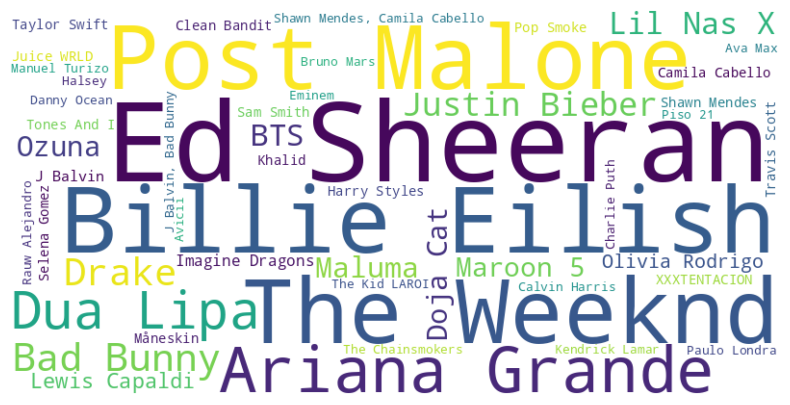

CPU times: user 30.5 s, sys: 4.3 s, total: 34.8 s
Wall time: 35.9 s


In [34]:
#Visualization of artist popularity

%%time

from wordcloud import WordCloud

top50 = df[(df['chart'] == 'top200') & (df['rank'] <= 50)]

# Get the counts of each artist
counts = top50['artist'].value_counts()

# Create and display the word cloud
wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white').generate_from_frequencies(counts.to_dict())
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

###**Top 10 Artist Ranking by Total Streams in All Regions**

In [35]:
## Calculate the top 10 artist ranking by total streams in all regions

%%time

# Group by both 'artist' and 'region', aggregate sum of streams
artist_ranking = df.groupby(by=['artist', 'region'], agg={'streams': vaex.agg.sum('streams')})

# Calculate total streams for each artist across all regions
artist_total_streams = artist_ranking.groupby(by='artist', agg={'streams': vaex.agg.sum('streams')})

# Select top 10 artists based on overall stream count
top_10_overall_artists = artist_total_streams.sort('streams', ascending=False).head(10).to_pandas_df()

top_10_overall_artists


CPU times: user 1min 54s, sys: 11.6 s, total: 2min 6s
Wall time: 1min 22s


,artist,streams
0,Ed Sheeran,23595661934
1,Post Malone,19452753354
2,Drake,18180639343
3,Billie Eilish,17193796480
4,Ariana Grande,15375848331
5,Dua Lipa,12147106434
6,Juice WRLD,12133081886
7,XXXTENTACION,12071900406
8,The Weeknd,12042803794
9,Olivia Rodrigo,9517652325


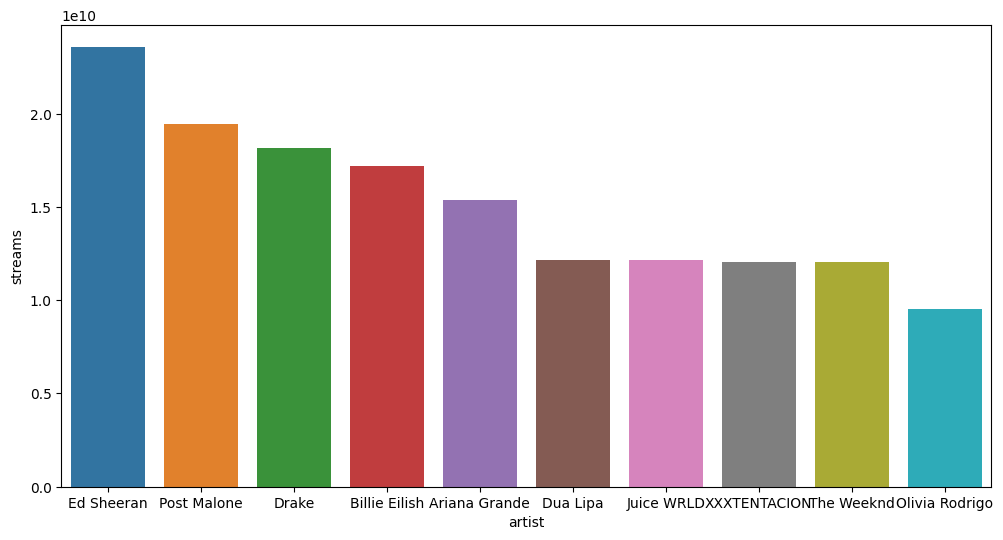

CPU times: user 310 ms, sys: 47.6 ms, total: 358 ms
Wall time: 392 ms


In [36]:
%%time
plt.figure(figsize=(12, 6))
# sns.barplot(x='streams_sum',y='artist',data=(top_10_overall_artists))
sns.barplot(x=top_10_overall_artists.artist,y=top_10_overall_artists.streams,data=(top_10_overall_artists))
plt.show()

###**Total Song Released for Each Year**

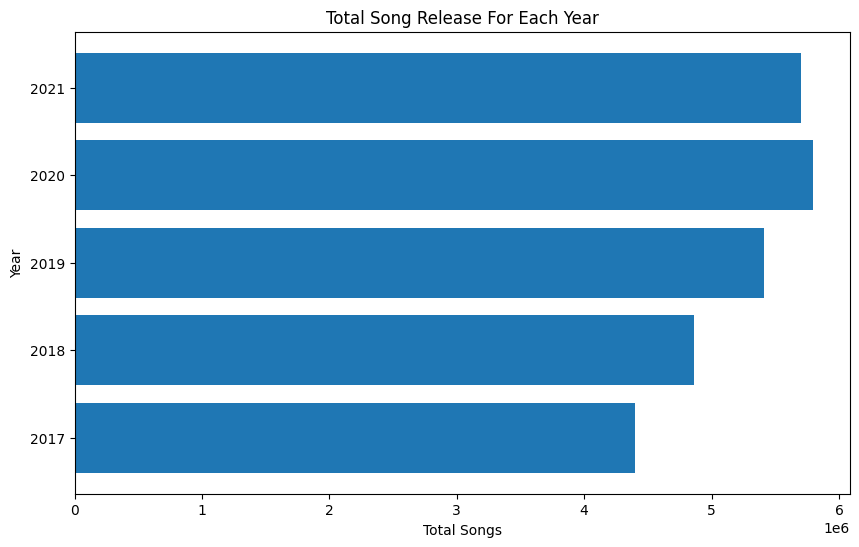

CPU times: user 265 ms, sys: 102 ms, total: 366 ms
Wall time: 254 ms


In [39]:
%%time

# Convert to Pandas DataFrame
df_pandas = songs_per_year.to_pandas_df()

# Plotting using Matplotlib
plt.figure(figsize=(10, 6))
plt.barh(df_pandas['year'], df_pandas['title'])
plt.xlabel('Total Songs')
plt.ylabel('Year')
plt.title('Total Song Release For Each Year')
plt.show()